In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

################################
#PROBLEM #1
################################
data_path_2 = 'C:\\Users\\angel\\Downloads\\cancer.csv'
cr_df = pd.read_csv(data_path_2)
data_path = 'C:\\Users\\angel\\Downloads\\diabetes.csv'
dataset = pd.read_csv(data_path)
dataset.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
##Pre-Processing
x = dataset.iloc[:,:8].values
y = dataset.iloc[:,8].values

x =  StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [3]:
##Logistic Regression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
     

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

[[98  9]
 [18 29]]


Text(0.5, 427.9555555555555, 'Predicted Result')

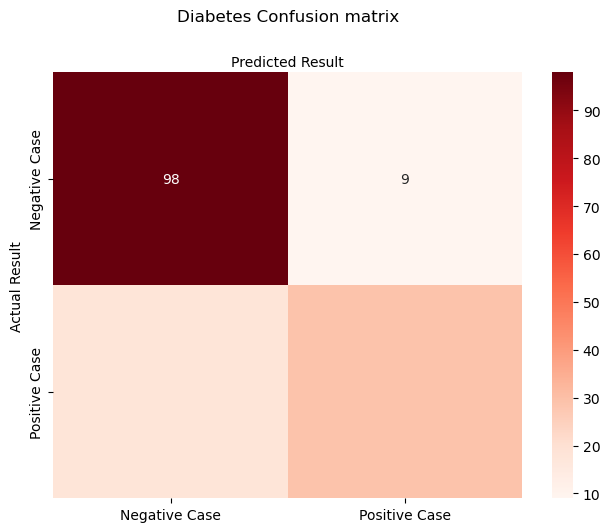

In [4]:
##Model Plotting
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots()
class_names = ["Negative Case", "Positive Case"]
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap ="Reds",fmt='g')

ax.xaxis.set_label_position("top")
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.tight_layout()
plt.title('Diabetes Confusion matrix', y=1.1)
plt.ylabel('Actual Result')
plt.xlabel('Predicted Result')

C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0.5, 1.0, 'Training Results - Accuracy and Loss over Iterations')

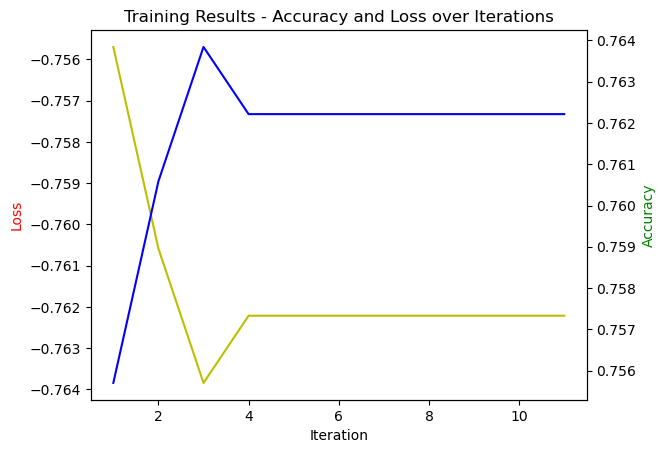

In [5]:
 ###########################
# Training Results
###########################

accuracy = []
iterations = classifier.n_iter_[0]
loss = []

for i in range(1, iterations + 1):
    classifier = LogisticRegression(solver='liblinear', max_iter=i, random_state=0)
    classifier.fit(x_train, y_train)
    y_train_prediction = classifier.predict(x_train)
    accuracy.append(metrics.accuracy_score(y_train, y_train_prediction))
    loss.append(-classifier.score(x_train, y_train))

###########################
# Plotting Training Results
###########################

fig, axis1 = plt.subplots()

axis2 = axis1.twinx()
axis1.plot(range(1, iterations + 1), loss, 'y-')
axis2.plot(range(1, iterations + 1), accuracy, 'b-')

axis1.set_xlabel('Iteration')
axis1.set_ylabel('Loss', color='r')
axis2.set_ylabel('Accuracy', color='g')

plt.title('Training Results - Accuracy and Loss over Iterations') 

In [6]:
########################
#PROBLEM #2-1
########################

In [7]:
##Pre-Processing
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Problem 2 - Part 1
##Replace M and B with 0 and 1
##cr_df=cr_df.drop('id',axis=1) ##
##diagnosis = cr_df.pop('diagnosis')## 
##cr_df['label']= diagnosis ##

##cr_df['label'].replace('B', 0, inplace=True)
##cr_df['label'].replace('M', 1, inplace=True)

cr_df['diagnosis'].replace('B', 0, inplace=True)
cr_df['diagnosis'].replace('M', 1, inplace=True)

#Drop last column containing nan values
cr_df = cr_df.drop('Unnamed: 32',axis=1)
#verify that last column is removed
print(cr_df.columns)
#excluding the first column "ID" from calculations
x = cr_df.iloc[:,2:].values
y = cr_df.iloc[:,1].values
y = y.astype(int)
x = StandardScaler().fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [8]:
classifier = LogisticRegression(random_state = 0, max_iter = 1000)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[65  2]
 [ 2 45]]
Accuracy: 0.9649122807017544
Precision: 0.9574468085106383
Recall: 0.9574468085106383
F1 Score: 0.9574468085106385


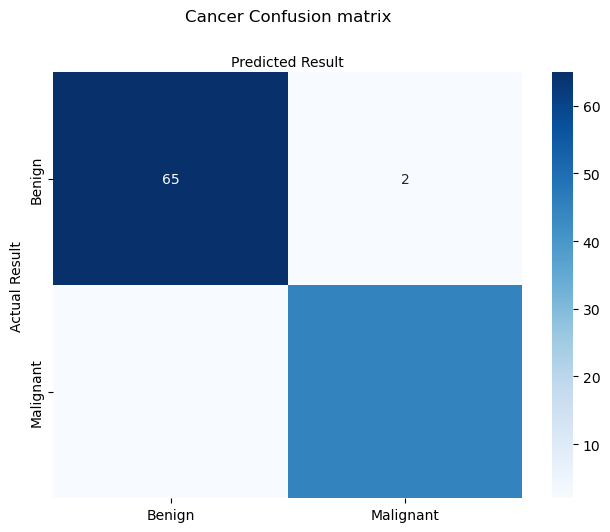

In [9]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots()
class_names = ["Benign", "Malignant"]
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap ="Blues",fmt='g')

ax.xaxis.set_label_position("top")
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.tight_layout()
plt.title('Cancer Confusion matrix', y=1.1)
plt.ylabel('Actual Result')
plt.xlabel('Predicted Result')

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

Text(0.5, 1.0, 'Training Results - Accuracy and Loss over Iterations')

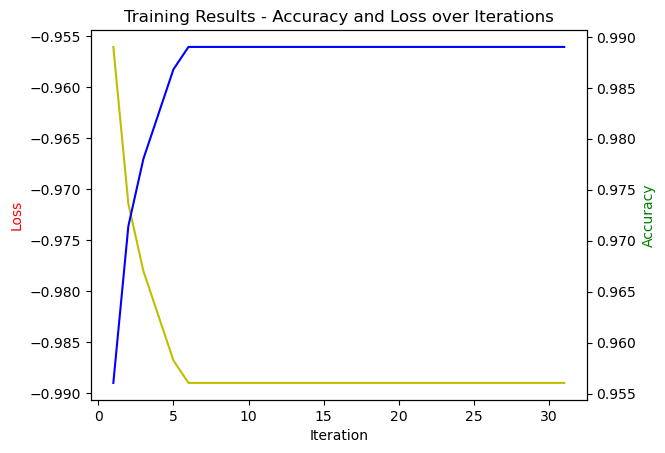

In [10]:
###########################
# Training Results
###########################

accuracy = []
iterations = classifier.n_iter_[0]
loss = []

for i in range(1, iterations + 1):
    classifier = LogisticRegression(solver='liblinear', max_iter=i, random_state=0)
    classifier.fit(x_train, y_train)
    y_train_prediction = classifier.predict(x_train)
    accuracy.append(metrics.accuracy_score(y_train, y_train_prediction))
    loss.append(-classifier.score(x_train, y_train))

###########################
# Plotting Training Results
###########################

fig, axis1 = plt.subplots()

axis2 = axis1.twinx()
axis1.plot(range(1, iterations + 1), loss, 'y-')
axis2.plot(range(1, iterations + 1), accuracy, 'b-')

axis1.set_xlabel('Iteration')
axis1.set_ylabel('Loss', color='r')
axis2.set_ylabel('Accuracy', color='g')

plt.title('Training Results - Accuracy and Loss over Iterations') 

In [11]:
##################
#Problem 2-2
##################

In [12]:
#Parameter Penalties
C = [10, 5, 1, .1, .001]
X_train =  x_train
X_test = x_test


#Printing out the different parameter penalties
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Training accuracy:\t%5.4f' %clf.score(X_train, y_train))
    print('Test accuracy:\t\t%5.4f' %clf.score(X_test, y_test))
    print('')

C: 10
Training accuracy:	0.9890
Test accuracy:		0.9474

C: 5
Training accuracy:	0.9890
Test accuracy:		0.9649

C: 1
Training accuracy:	0.9890
Test accuracy:		0.9561

C: 0.1
Training accuracy:	0.9758
Test accuracy:		0.9737

C: 0.001
Training accuracy:	0.6374
Test accuracy:		0.5877



In [13]:
#Choosing the best penatly and using it for logistic regression

#chose 0.1 as it it has the least difference between training and test accuracy
clf = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
clf.fit(X_train, y_train)

Y_pred = clf.predict(X_test)

param_cnf_matrix = confusion_matrix(y_test, Y_pred)

Accuracy: 0.9736842105263158
Precision: 0.9782608695652174
Recall: 0.9574468085106383
F1 Score: 0.967741935483871 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[66  1]
 [ 2 45]]


Text(0.5, 427.9555555555555, 'Predicted Result')

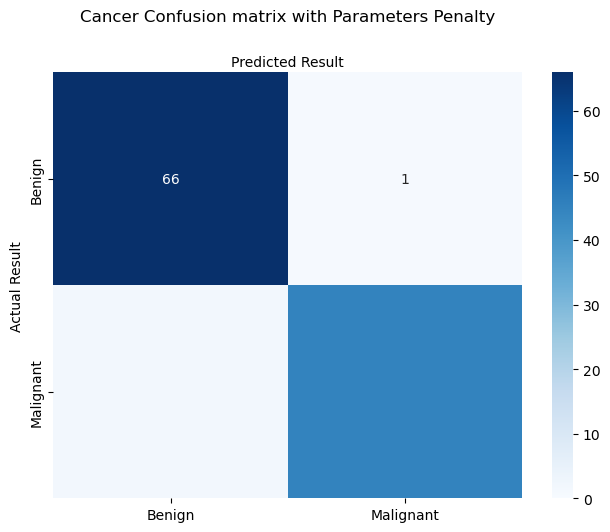

In [14]:
#Confusion Matrix Plotting with Parameter Penalty
print("Accuracy:", metrics.accuracy_score(y_test, Y_pred))
print("Precision:", metrics.precision_score(y_test, Y_pred))
print("Recall:", metrics.recall_score(y_test, Y_pred))
print("F1 Score:", metrics.f1_score(y_test, Y_pred), "\n")

print(metrics.classification_report(y_test, Y_pred))
print(metrics.confusion_matrix(y_test, Y_pred))

fig, ax = plt.subplots()
class_names = ["Benign", "Malignant"]

##trying to find underlying issue why bottom two numbers on heatmap wont print
sns.heatmap(pd.DataFrame(param_cnf_matrix), annot=True, cmap ="Blues",fmt='g',vmin = 0, vmax=max(param_cnf_matrix.max(axis=0)))

ax.xaxis.set_label_position("top")
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.tight_layout()
plt.title('Cancer Confusion matrix with Parameters Penalty', y=1.1)
plt.ylabel('Actual Result')
plt.xlabel('Predicted Result')

C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

Text(0.5, 1.0, 'Training Results - Accuracy and Loss over Iterations')

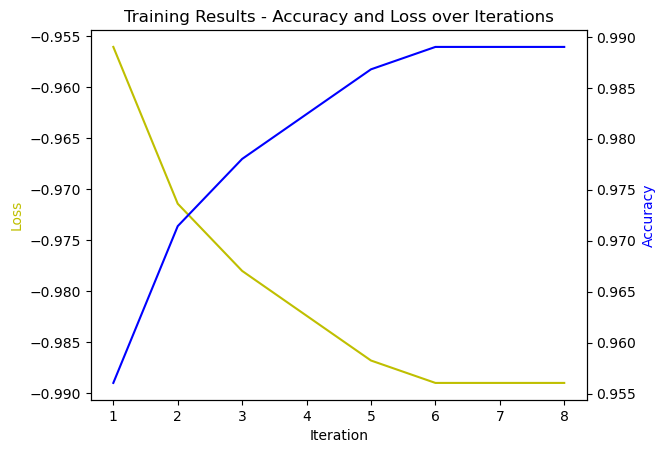

In [15]:
###########################
# Training Results
###########################

accuracy = []
iterations = classifier.n_iter_[0]
loss = []

for i in range(1, iterations + 1):
    classifier = LogisticRegression(solver='liblinear', max_iter=i, random_state=0)
    classifier.fit(X_train, y_train)
    y_train_prediction = classifier.predict(X_train)
    accuracy.append(metrics.accuracy_score(y_train, y_train_prediction))
    loss.append(-classifier.score(X_train, y_train))

###########################
# Plotting Training Results
###########################

fig, axis1 = plt.subplots()

axis2 = axis1.twinx()
axis1.plot(range(1, iterations + 1), loss, 'y-')
axis2.plot(range(1, iterations + 1), accuracy, 'b-')

axis1.set_xlabel('Iteration')
axis1.set_ylabel('Loss', color='y')
axis2.set_ylabel('Accuracy', color='b')

plt.title('Training Results - Accuracy and Loss over Iterations') 

In [16]:
##################
#Problem 3
##################

In [17]:
#Create a Naive Gaussian Classifier 
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        67
           1       0.88      0.89      0.88        47

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

[[61  6]
 [ 5 42]]
Accuracy: 0.9035087719298246
Precision: 0.875
Recall: 0.8936170212765957
F1 Score: 0.8842105263157894 



Text(0.5, 427.9555555555555, 'Predicted Result')

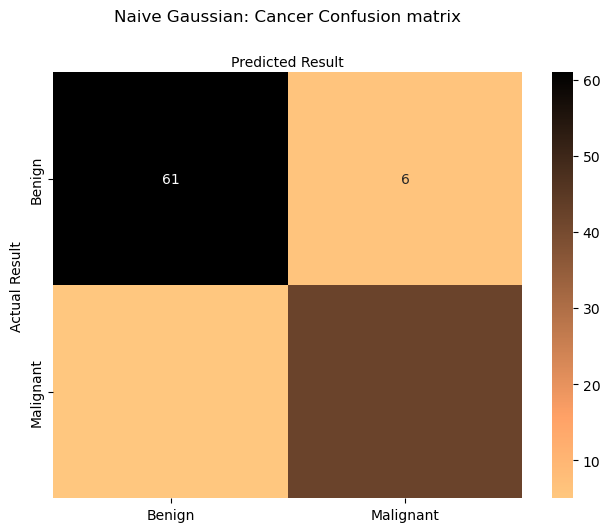

In [18]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred), "\n")
fig, ax = plt.subplots()
class_names = ["Benign", "Malignant"]
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap ="copper_r",fmt='g')

ax.xaxis.set_label_position("top")
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.tight_layout()
plt.title('Naive Gaussian: Cancer Confusion matrix', y=1.1)
plt.ylabel('Actual Result')
plt.xlabel('Predicted Result')

In [19]:
##################
#Problem 4
##################

K=1 Principal Components:
Accuracy: 0.9035
Precision: 0.8750
Recall: 0.8936
F1-Score: 0.8842
----------------------------------------
K=2 Principal Components:
Accuracy: 0.9298
Precision: 0.8824
Recall: 0.9574
F1-Score: 0.9184
----------------------------------------
K=3 Principal Components:
Accuracy: 0.9123
Precision: 0.8776
Recall: 0.9149
F1-Score: 0.8958
----------------------------------------
K=4 Principal Components:
Accuracy: 0.9474
Precision: 0.9362
Recall: 0.9362
F1-Score: 0.9362
----------------------------------------
K=5 Principal Components:
Accuracy: 0.9561
Precision: 0.9565
Recall: 0.9362
F1-Score: 0.9462
----------------------------------------
K=6 Principal Components:
Accuracy: 0.9561
Precision: 0.9565
Recall: 0.9362
F1-Score: 0.9462
----------------------------------------
K=7 Principal Components:
Accuracy: 0.9561
Precision: 0.9565
Recall: 0.9362
F1-Score: 0.9462
----------------------------------------
K=8 Principal Components:
Accuracy: 0.9561
Precision: 0.9565
R

<function matplotlib.pyplot.show(close=None, block=None)>

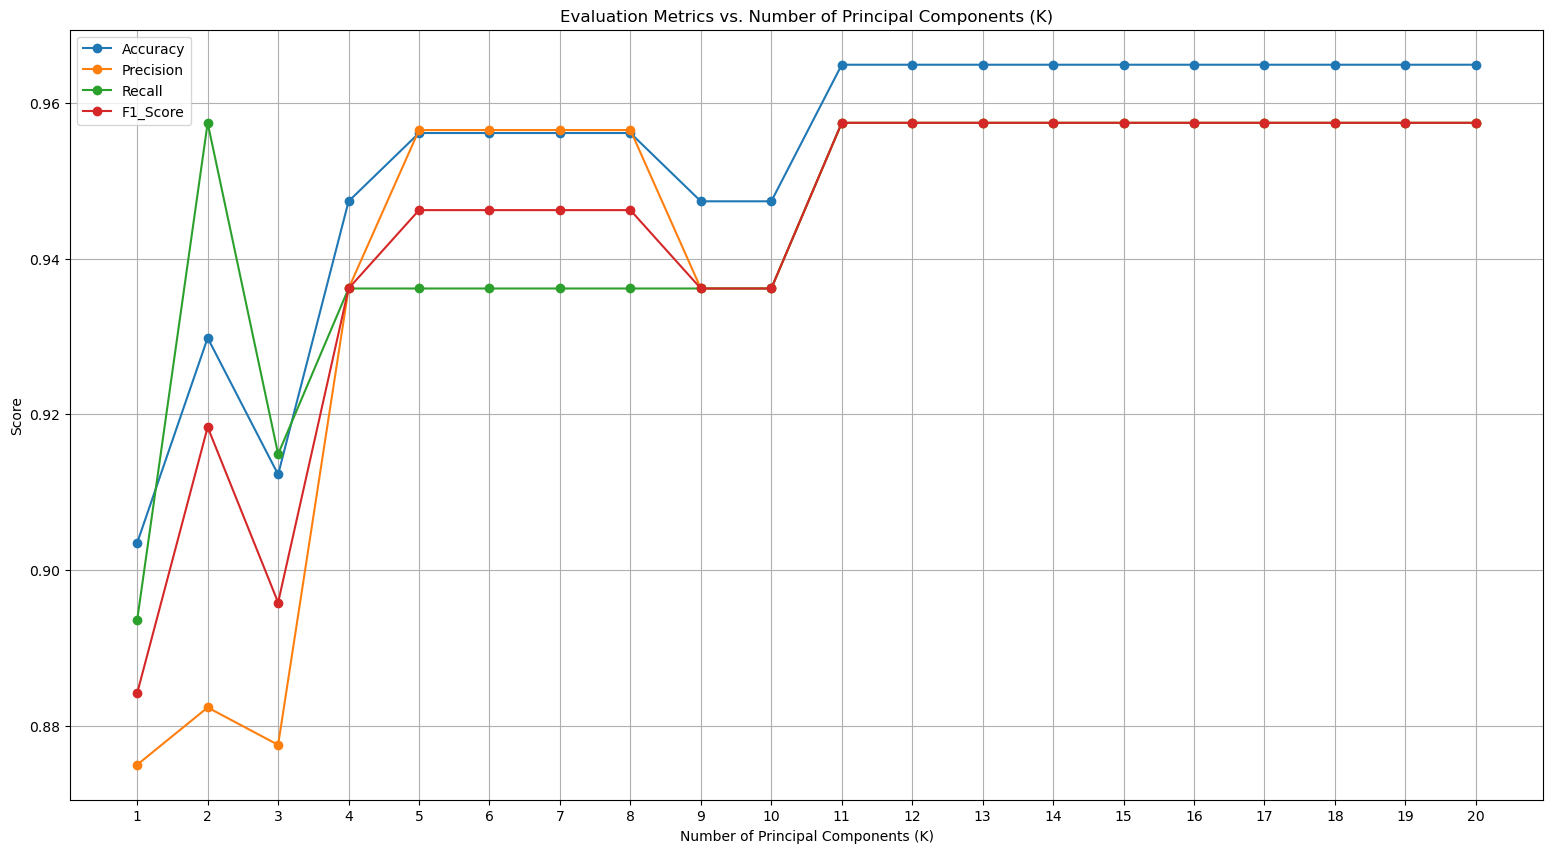

In [22]:
from sklearn.decomposition import PCA
# Select N values from 1 to 20
K = range(1, 21) 

# Lists to store evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for k in K:
    # PCA, Training, and Evaluation
    pca = PCA(n_components=k)
    principal_components = pca.fit_transform(x)

    X_train, X_test, Y_train, Y_test = train_test_split(principal_components, y, train_size=0.8, test_size=0.2, random_state=0)

    classifier = LogisticRegression(max_iter=1000, random_state=0)  # Consider exploring hyperparameter tuning
    classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    # Calculate Classification Metrics
    #REMEMBER TO INCLUDE 'metrics' or error
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    f1_score = metrics.f1_score(Y_test, Y_pred)

    # Store Metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

    #Printing metrics for all values of K
    print(f"K={k} Principal Components:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")  # Directly access f1_score
    print("-" * 40)  # Separator

#Optimal K Value
best_k_index = np.argmax(np.array([accuracy_list, precision_list, recall_list, f1_score_list]))
optimal_k = K[best_k_index]
print('Optimal K Value:',optimal_k)

# Plot the evaluation metrics over different values of K
plt.figure(figsize=(19, 10))

plt.plot(K, accuracy_list, label='Accuracy', marker='o')
plt.plot(K, precision_list, label='Precision', marker='o')
plt.plot(K, recall_list, label='Recall', marker='o')
plt.plot(K, f1_score_list, label='F1_Score', marker='o')


plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Evaluation Metrics vs. Number of Principal Components (K)')
plt.legend()
plt.grid(True)
plt.xticks(K)
plt.show

In [ ]:
##################
#Problem 5
##################

In [ ]:
# Select N values from 1 to 20
K = range(1, 20)  # Explore a wider range

# Lists to store evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for k in K:
    # PCA, Training, and Evaluation
    pca = PCA(n_components=k)
    principal_components = pca.fit_transform(x)

    X_train, X_test, Y_train, Y_test = train_test_split(principal_components, y, train_size=0.8, test_size=0.2, random_state=0)

    classifier = GaussianNB()
    classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    # Calculate Classification Metrics
    #REMEMBER TO INCLUDE 'metrics' or error
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    f1_score = metrics.f1_score(Y_test, Y_pred)

    # Store Metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

    #Printing metrics for all values of K
    print(f"K={k} Principal Components:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")  
    print("-" * 40)  


# Plot the evaluation metrics over different values of K
plt.figure(figsize=(21, 10))

#Plotting
plt.plot(K, accuracy_list, label='Accuracy', marker='o')
plt.plot(K, precision_list, label='Precision', marker='o')
plt.plot(K, recall_list, label='Recall', marker='o')
plt.plot(K, f1_score_list, label='F1_Score', marker='o')


plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Evaluation Metrics vs. Number of Principal Components (K)')
plt.legend()
plt.grid(True)
plt.xticks(range(1,20))
plt.show